<h1 style="font-size:32px; text-align:center;">Projet Scoring</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Ousmane KA</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
from skimpy import skim
import warnings
import os
import black
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    log_loss
)
import shap
warnings.filterwarnings('ignore')


In [2]:
hmeq = pd.read_csv('./Dataset/hmeq.csv')
hmeq_classic = pd.read_csv('./Dataset/hmeq_clean_classic.csv')
hmeq_classic1 = pd.read_csv('./Dataset/hmeq_clean_classic_1.csv')
hmeq_classic2 = pd.read_csv('./Dataset/hmeq_clean_classic_2.csv')
hmeq_miticulous = pd.read_csv('./Dataset/hmeq_clean_miticulous.csv')

<span style="color:#0A8791; font-size:24px;"><b><u>Arbre Décisionnel</u></b></span>

Afficher le head pour les 4 dataframes 


In [3]:
hmeq_classic.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [4]:
hmeq_classic1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,3300,10.160491,10.571983,HomeImp,Other,10.5,0.0,0.0,4.557729,1.0,9.0,34.818262
1,1,3300,11.157022,11.133143,HomeImp,Other,7.0,0.0,2.0,4.810828,0.0,14.0,34.818262
2,1,3300,9.510519,10.181157,HomeImp,Other,4.0,0.0,0.0,5.013742,1.0,10.0,34.818262
3,1,3300,11.082450,11.399045,DebtCon,Other,7.0,0.0,0.0,5.161734,1.0,20.0,34.818262
4,0,3300,11.490690,11.626263,HomeImp,Office,3.0,0.0,0.0,4.546835,0.0,14.0,34.818262


In [5]:
hmeq_classic2.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
1,0,2000,64536.0,87400.0,DebtCon,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,34.818262
2,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
3,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
4,0,2500,7229.0,44516.0,HomeImp,Self,7.0,0.0,0.0,208.000000,0.0,12.0,34.818262


In [6]:
hmeq_miticulous.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.50,0.0,0.0,94.366667,1.000000,9.00,31.603711
1,1,1300,70053.0,70053.0,HomeImp,Other,7.00,0.0,2.0,121.833333,0.000000,14.00,32.975041
2,1,1500,13500.0,16700.0,HomeImp,Other,4.00,0.0,0.0,149.466667,1.000000,10.00,31.238346
3,1,1500,6318.0,8796.0,HomeImp,Other,6.15,3.0,0.0,125.715233,1.186743,15.71,31.016780
4,0,1700,97800.0,112000.0,HomeImp,Office,3.00,0.0,0.0,93.333333,0.000000,14.00,33.846982


On a 4 dataframes avec lesquelles on peut travaillées, mais dans ce code j'utilise seulement une des 4. Vous pouvez les tester toutes puisque j'ai chargé tous les datasets.

- BAD : Variable cible (0 = bon crédit, 1 = mauvais crédit).
- LOAN : Montant du prêt demandé.
- MORTDUE : Montant dû sur l’hypothèque actuelle (contient des valeurs manquantes).
- VALUE : Valeur estimée de la propriété.
- REASON : Raison du prêt (Catégorique : "DebtCon" pour consolidation de dettes, "HomeImp" pour amélioration de l’habitat).
- JOB : Type d’emploi (Catégorique, ex: "Other", "Office", etc.).
- YOJ : Années d’expérience dans le travail actuel.
- DEROG : Nombre de rapports négatifs dans l'historique de crédit.
- DELINQ : Nombre de délais de paiement dans l’historique de crédit.
- CLAGE : Âge moyen des comptes de crédit en mois.
- NINQ : Nombre de demandes de crédit récentes.
- CLNO : Nombre total de lignes de crédit.
- DEBTINC : Ratio dette/revenu (contient des valeurs manquantes).

Travaillons avec hmeq_miticulous

In [7]:
hmeq_miticulous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5914 non-null   int64  
 1   LOAN     5914 non-null   int64  
 2   MORTDUE  5914 non-null   float64
 3   VALUE    5914 non-null   float64
 4   REASON   5914 non-null   object 
 5   JOB      5914 non-null   object 
 6   YOJ      5914 non-null   float64
 7   DEROG    5914 non-null   float64
 8   DELINQ   5914 non-null   float64
 9   CLAGE    5914 non-null   float64
 10  NINQ     5914 non-null   float64
 11  CLNO     5914 non-null   float64
 12  DEBTINC  5914 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 600.8+ KB


In [8]:
# afficher les colonnes de hmeq
hmeq_miticulous.columns


Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [9]:
# afficher les colonnes et valeurs catégoriques de hmeq (valeurs de REASON et JOB)
hmeq_miticulous['REASON'].value_counts()


REASON
DebtCon    4086
HomeImp    1828
Name: count, dtype: int64

In [10]:
hmeq_miticulous['JOB'].value_counts()

JOB
Other      2552
ProfExe    1329
Office      958
Mgr         774
Self        193
Sales       108
Name: count, dtype: int64

Puisse qu'on utilise le one hot encoding alors on ne fera pas usage du drop_first.
En effet ceci gardera le nombres total de catégories ce qui préférable pour les tree-based models.

In [11]:
# Étape 2 : Encodage des variables catégoriques

# Encodage des variables catégoriques avec One-Hot Encoding
hmeq_miticulous = pd.get_dummies(hmeq_miticulous, columns=["REASON", "JOB"])

# Vérifier la structure des données après encodage
hmeq_miticulous.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.50,0.0,0.0,94.366667,1.000000,9.00,31.603711,False,True,False,False,True,False,False,False
1,1,1300,70053.0,70053.0,7.00,0.0,2.0,121.833333,0.000000,14.00,32.975041,False,True,False,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.00,0.0,0.0,149.466667,1.000000,10.00,31.238346,False,True,False,False,True,False,False,False
3,1,1500,6318.0,8796.0,6.15,3.0,0.0,125.715233,1.186743,15.71,31.016780,False,True,False,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.00,0.0,0.0,93.333333,0.000000,14.00,33.846982,False,True,False,True,False,False,False,False


In [12]:
hmeq_miticulous.columns


Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp',
       'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales',
       'JOB_Self'],
      dtype='object')

Pour des meilleures résultats, j'ai décidé de choisir les meilleures features sur lesquels appliquer notre model decision tree.

Et pour cela le SelectKBest est le plus adapté. A noter que SelectKBest se base sur l'ANOVA avecc f_classic et chi2 pour les variables catégoriques.

J'ai penser à l'ACP mais ce n'est pas adapté dans cette étude.

### Sélection des Variables avec SelectKBest : Methode 1

In [13]:
numerical_columns = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

categorical_columns = ['REASON_DebtCon','REASON_HomeImp','JOB_Mgr','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']


In [14]:
select_numerical_features = SelectKBest(f_classif, k=8) # pour sélectionner les 8 meilleures caractéristiques numériques
Numerical_selected = select_numerical_features.fit(hmeq_miticulous[numerical_columns], hmeq_miticulous['BAD']) # pour ajuster les caractéristiques sélectionnées dans le modèle ANOVA
scores_numerical = -np.log10(Numerical_selected.pvalues_) # pour transformer les p-values des caractéristiques en scores


Text(0, 0.5, 'Caractéristiques Numériques')

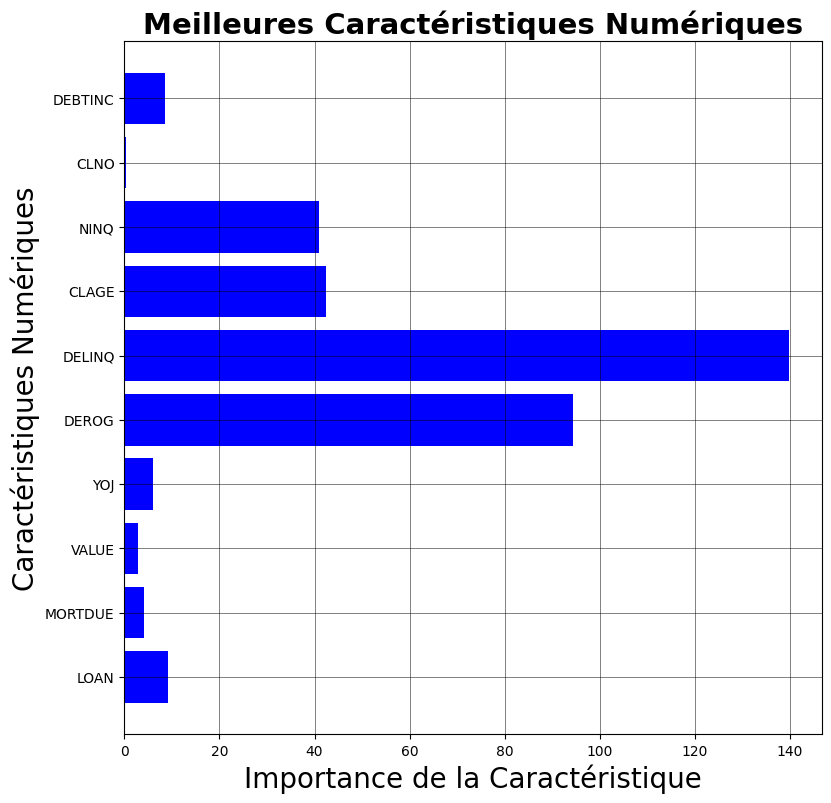

In [15]:
# Taille de la figure
fig, ax = plt.subplots(figsize=(9, 9)) 

# Diagramme à barres horizontal
ax.barh(numerical_columns, scores_numerical, color='blue') 

# Ajouter des lignes de grille sur les axes x et y
ax.grid(visible=True, color='black', linestyle='-', linewidth=0.7, alpha=0.5) 

# Ajouter un titre et des étiquettes au graphique
ax.set_title('Meilleures Caractéristiques Numériques', fontsize=21, fontweight='bold') 
plt.xlabel('Importance de la Caractéristique', fontsize=20) 
plt.ylabel('Caractéristiques Numériques', fontsize=20)  


In [16]:
# pour imprimer les caractéristiques numériques sélectionnées
print('Caractéristiques numériques sélectionnées par le test ANOVA :', hmeq_miticulous[numerical_columns].columns[Numerical_selected.get_support()].to_list())


Caractéristiques numériques sélectionnées par le test ANOVA : ['LOAN', 'MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC']


In [17]:
select_categorical_features = SelectKBest(chi2, k=7)  # pour sélectionner les 7 meilleures caractéristiques catégorielles
Categorical_selected = select_categorical_features.fit(hmeq_miticulous[categorical_columns], hmeq_miticulous['BAD'])  # pour ajuster les colonnes catégorielles dans le test chi2
scores_categorical = -np.log10(Categorical_selected.pvalues_)  # pour transformer les p-values des caractéristiques en scores


Text(0, 0.5, 'Caractéristiques Catégorielles')

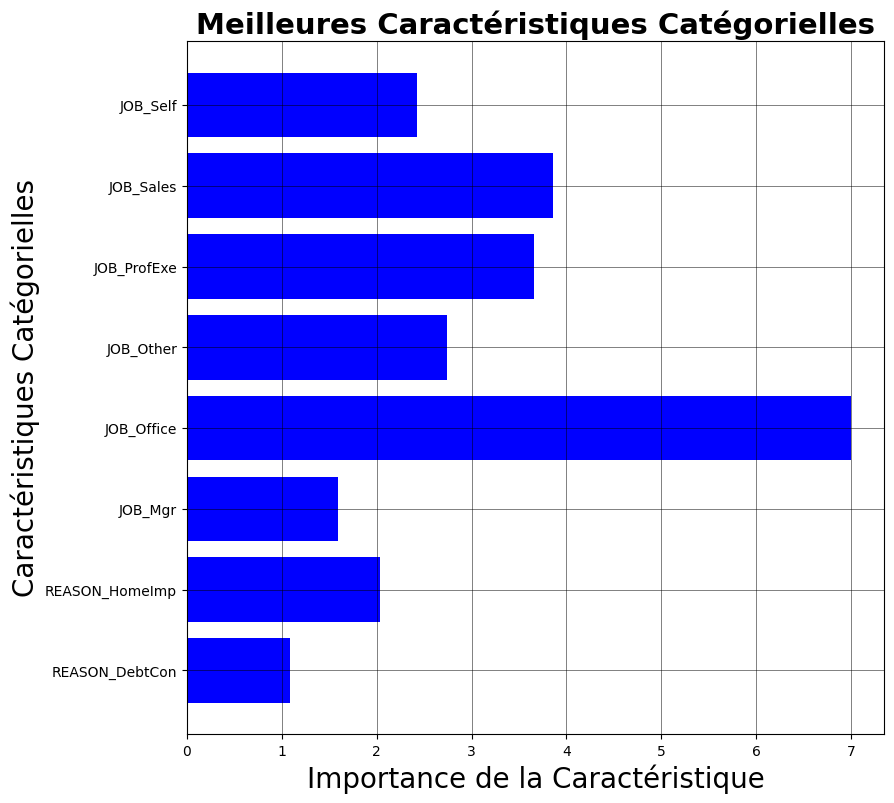

In [18]:
# Taille de la figure
fig, ax = plt.subplots(figsize=(9, 9)) 
# Diagramme à barres horizontal
ax.barh(categorical_columns, scores_categorical, color='blue') 
# Ajouter des lignes de grille x et y
ax.grid(visible=True, color='black', linestyle='-', linewidth=0.7, alpha=0.5) 
# Ajouter un titre et des étiquettes au graphique
ax.set_title('Meilleures Caractéristiques Catégorielles', fontsize=21, fontweight='bold') 
plt.xlabel('Importance de la Caractéristique', fontsize=20) 
plt.ylabel('Caractéristiques Catégorielles', fontsize=20) 


In [19]:
# pour imprimer les caractéristiques numériques sélectionnées
print('Caractéristiques catégorielles sélectionnées par le test Chi2 :', hmeq_miticulous[categorical_columns].columns[Categorical_selected.get_support()].to_list())


Caractéristiques catégorielles sélectionnées par le test Chi2 : ['REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']


In [20]:
# Séparation 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(hmeq_miticulous.drop(columns=['BAD']), hmeq_miticulous['BAD'], test_size=0.2, random_state=42)

### Sélection des Variables avec SelectKBest : Methode 2

f_classif analyse si les moyennes des différentes classes de la variable cible ( BAD = 0 et BAD = 1) sont significativement différentes en fonction des valeurs des variables explicatives. Cela permet d'identifier quelles variables sont les plus discriminantes à prédire BAD.

In [21]:
X_train1 = X_train
y_train1 = y_train

X_train2 = X_train
y_train2 = y_train

In [22]:
# Appliquer SelectKBest avec f_classif pour obtenir les scores F et les p-values
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train1, y_train1)

# Extraire les scores et les p-values
scores = selector.scores_
pvalues = selector.pvalues_

# dataframe pour afficher les résultats
feature_scores = pd.DataFrame({
    'Feature': X_train1.columns,
    'F-Score': scores,
    'p-Value': pvalues
})
feature_scores_sorted = feature_scores.sort_values(by='F-Score', ascending=False)  # Trier les variables par score décroissant

feature_scores['p-Value'] = feature_scores['p-Value'].apply(lambda x: '{:.4f}'.format(x))

feature_scores_sorted = feature_scores.sort_values(by='F-Score', ascending=False) # Trier les variables par ordre décroissant de F-Score

# Afficher le dataframe trié
feature_scores_sorted

,Feature,F-Score,p-Value
5,DELINQ,556.161452,0.0000
4,DEROG,336.399560,0.0000
6,CLAGE,152.975360,0.0000
7,NINQ,146.143560,0.0000
13,JOB_Office,31.114034,0.0000
0,LOAN,31.095498,0.0000
9,DEBTINC,26.627838,0.0000
3,YOJ,18.994557,0.0000
16,JOB_Sales,16.925074,0.0000
15,JOB_ProfExe,16.116587,0.0001


### Sélection des caractéristiques pour Random Forest

Il est important de choisir des caractéristiques (features) qui ont un pouvoir prédictif fort et sont fortement corrélées avec la variable cible. Voici une manière simple de choisir les bonnes caractéristiques :

#### Interprétation du F-Score et du P-Value :

1. **F-Score** : Mesure de l'importance d'une caractéristique par rapport à la cible. Plus le F-score est élevé, plus la caractéristique est pertinente pour la variable cible.
2. **P-Value** : Permet de tester l'hypothèse nulle selon laquelle la caractéristique n'a aucun effet sur la cible. Plus la p-value est faible, plus la caractéristique est significative statistiquement.

#### Ce qu'il faut rechercher :
- **F-Score** : Plus il est élevé, mieux la caractéristique distingue les différentes valeurs de la cible.
- **P-Value** : En général, une p-value inférieure à **0,05** est considérée comme significative. Les caractéristiques avec **p-value < 0,05** doivent être priorisées.

#### Sélection des caractéristiques selon le F-Score et le P-Value :
Il faut privilégier les caractéristiques avec **un F-score élevé** et **une p-value faible**. Voici les caractéristiques à retenir :

##### Caractéristiques avec un F-score élevé et une p-value faible :
- **DELINQ**, **DEROG**, **CLAGE**, **NINQ**, **JOB_Office**, **LOAN**, **DEBTINC**, **YOJ**, **JOB_Sales**, **JOB_ProfExe**, **MORTDUE**, **JOB_Other**, **VALUE**, **REASON_DebtCon**, **REASON_HomeImp**, **JOB_Self**, **JOB_Mgr** (on peut aussi se passer de choisir JOB_Mgr avec une contribution très limité).

##### Caractéristiques à exclure (p-value > 0,05) :
- **CLNO** : F-score faible et p-value très élevée (0,6315), ce qui signifie qu'elle n'est pas significative pour la prédiction de la cible.

#### Conclusion :
Pour le modèle Random Forest, il est préférable d'utiliser les caractéristiques qui ont une **p-value inférieure à 0,05** et un **F-score élevé**. **CLNO** est à exclure car elle ne contribue pas à la prédiction.


In [23]:
# Sélection des variables à partir de SelectKBest basé sur les p-values ​​extrêmement faibles, 
# indiquant une forte capacité à discriminer entre les classes de la variable cible BAD.
# avec k='all'

selected_features0 = [
    'DELINQ',        # F-Score: 556.16, p-value: 0.0000
    'DEROG',         # F-Score: 336.40, p-value: 0.0000
    'CLAGE',         # F-Score: 152.98, p-value: 0.0000
    'NINQ',          # F-Score: 146.14, p-value: 0.0000
    'JOB_Office',    # F-Score: 31.11, p-value: 0.0000
    'LOAN',          # F-Score: 31.10, p-value: 0.0000
    'DEBTINC',       # F-Score: 26.63, p-value: 0.0000
    'YOJ',           # F-Score: 18.99, p-value: 0.0000
    'JOB_Sales',     # F-Score: 16.93, p-value: 0.0000
    'JOB_ProfExe',   # F-Score: 16.12, p-value: 0.0001
    'MORTDUE',       # F-Score: 16.02, p-value: 0.0001
    'JOB_Other',     # F-Score: 15.93, p-value: 0.0001
    'VALUE'          # F-Score: 13.67, p-value: 0.0002
]


Mais on ne choissira pas cette liste car son obtention est issue d'un mélange de valeurs numériques et catégoriques

In [24]:
# meilleurs candididats pour un meilleur RandomForest model
# features proposés par la première méthode (Methode 1) plus robuste avec séparations des valeurs numiques et categories
selected_features = [
    'REASON_HomeImp', 
    'JOB_Mgr', 
    'JOB_Office', 
    'JOB_Other', 
    'JOB_ProfExe', 
    'JOB_Sales', 
    'JOB_Self', 
    'LOAN', 
    'MORTDUE', 
    'YOJ', 
    'DEROG', 
    'DELINQ', 
    'CLAGE', 
    'NINQ', 
    'DEBTINC'
]


X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]

#### 1. Modélisation Arbre Décisionnel 

 Nous avons tester 3 modele : 
 
 - un sans optimisation(avec gini et avec entropy as criterion)
 - le deuxieme un modele optimisé avec grid search
 - le dernier avec optimisation en sélectionnant les features

 et par la suite regarder  comment evoluent nos métriques en fonction du nombre de variables
.

Puisque on prévoit un résultat binaire (c'est-à-dire la variable "BAD"), utilisons des classificateurs et évaluez les modèles avec des métriques de classification telles que la précision, le rappel et l'AUC.

##### 1.1. Arbre Décisionnel Sans optimisation (entropy)


Pour adresser le fait que la variable "BAD" ait plus de 80% en 0 et 20% en 1, ce biais sera résolu en accordant autant d'importance aux 2 catégories avec le paramètre class_weight='balanced'

In [25]:
X_train.shape,X_test.shape

((4731, 18), (1183, 18))

avec entropy comme critère

In [26]:
# Invocation de la fonction du classificateur d'arbre de décision. Utilisation de la méthode 'entropy' pour trouver les colonnes de séparation.
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, 
                                        max_depth=3, min_samples_leaf=5)


In [27]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [28]:
model_entropy.score(X_train, y_train)  # performance sur les données d'entrainement

0.8372437116888607

In [29]:
model_entropy.score(X_test, y_test)  # performance sur les données de test

0.8072696534234995

In [30]:
from sklearn.tree import export_graphviz
from io import StringIO
import six
from IPython.display import Image  
import pydotplus
import graphviz

xvar = hmeq_miticulous.drop('BAD', axis=1)
feature_cols = xvar.columns

# feature_cols = [
#     'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 
#     'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 
#     'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 
#     'JOB_Sales', 'JOB_Self'
# ]


In [31]:
# Filtrer xvar pour inclure uniquement les fonctionnalités sélectionnées
xvar = xvar[feature_cols]
# Vérifier la forme de xvar et de feature_cols
print("Forme de xvar :", xvar.shape)  # Devrait être (n_samples, 18)
print("Nombre de fonctionnalités dans feature_cols :", len(feature_cols))  # Devrait être 18

# Vérifier le nombre de fonctionnalités dans le modèle
print("Nombre de fonctionnalités dans model_entropy :", model_entropy.n_features_in_)  # Devrait être 18


Forme de xvar : (5914, 18)
Nombre de fonctionnalités dans feature_cols : 18
Nombre de fonctionnalités dans model_entropy : 18


In [32]:
# Afficher les colonnes de xvar
print("Colonnes dans xvar :", xvar.columns.tolist())


Colonnes dans xvar : ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']


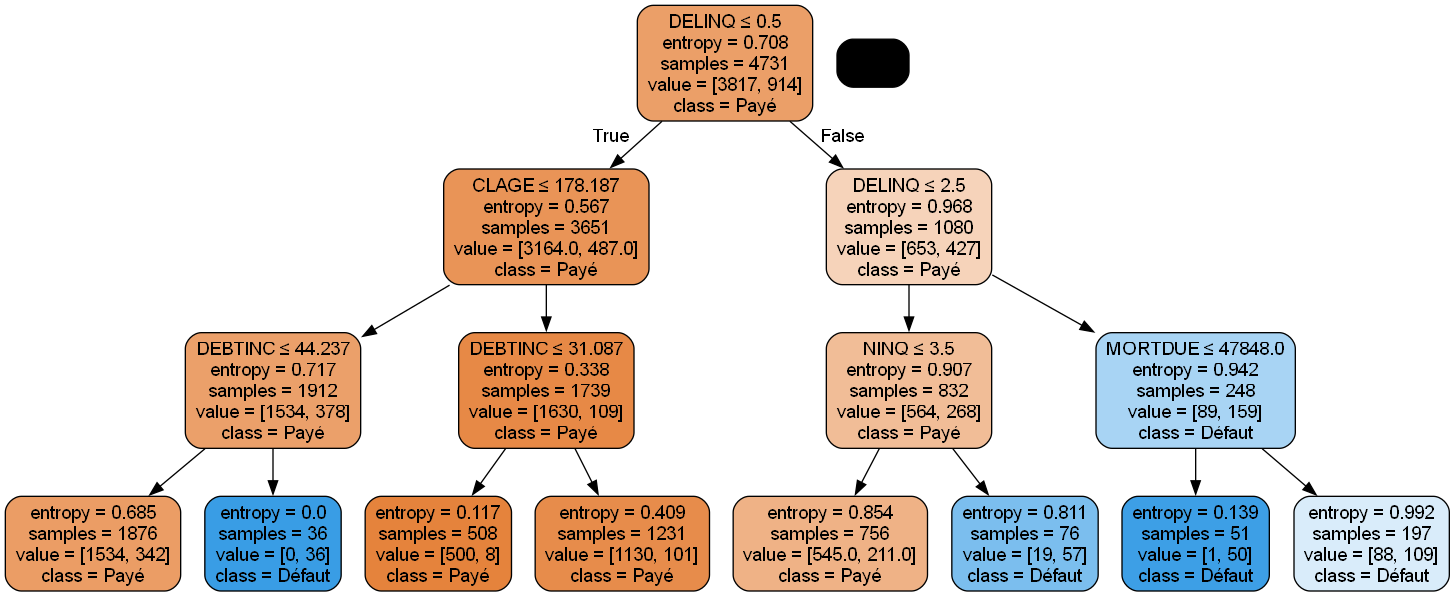

In [33]:
# Création d'un objet StringIO pour stocker la représentation DOT du modèle
dot_data = StringIO()

# Exportation du modèle sous forme de graphique DOT
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['Payé', 'Défaut'])

# Génération du graphique à partir des données DOT
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Écriture du graphique au format PNG
graph.write_png('df_pruned_model_entropy.png')

# Affichage de l'image PNG générée
Image(graph.create_png())


##### Evaluation des performances du modele

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

y_train_pred = model_entropy.predict(X_train)
y_test_pred = model_entropy.predict(X_test)

# Calculer des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table1 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# le tableau d'évaluation des performances
print(performance_table1)


    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.837244          0.807270
1        AUC                 0.623708          0.601100
2     Recall                 0.275711          0.244000
3  Precision                 0.700000          0.610000
4   F1-Score                 0.395604          0.348571


**Analyse des performances du modèle d'arbre de décision (avec Entropy comme critère)**

L'arbre de décision basique présente des résultats nettement différents par rapport aux modèles précédents.

**Interprétation des résultats :**

| Métrique | Train | Test | Observations |
| --- | --- | --- | --- |
| Accuracy | 0.837 | 0.807 | Performances globales correctes, mais en deçà des modèles plus complexes. |
| AUC | 0.624 | 0.601 | Faible capacité à distinguer les classes positives et négatives. |
| Recall | 0.276 | 0.244 | Mauvaise capacité à détecter les cas positifs, ce qui signifie beaucoup de faux négatifs. |
| Precision | 0.700 | 0.610 | Bonne précision, mais probablement due à un faible nombre de prédictions positives. |
| F1-Score | 0.396 | 0.349 | Mauvais équilibre entre précision et rappel, ce qui réduit la fiabilité globale. |

**Analyse détaillée :**

- Très faible Recall (0.244 sur test) → Trop de faux négatifs
  → Cela signifie que l'arbre de décision ne capture pas bien les cas positifs, ce qui peut poser problème si l'objectif est de bien détecter une certaine classe.

- AUC très bas (0.601) → Mauvaise séparation des classes
  → Contrairement aux modèles plus avancés, l'arbre de décision a du mal à différencier correctement les classes positives et négatives.

- Precision correcte (0.610), mais compensée par un mauvais rappel
  → L'arbre fait peu d'erreurs en prédisant une classe positive, mais il en détecte trop peu, ce qui entraîne un déséquilibre.

En conclusion, bien que l'arbre de décision soit un modèle simple et interprétable, ses performances sont nettement inférieures aux autres approches testées. Il ne semble pas adapté pour cette problématique, surtout si l'objectif principal est de bien détecter les cas positifs.


##### Regardons la courbe roc

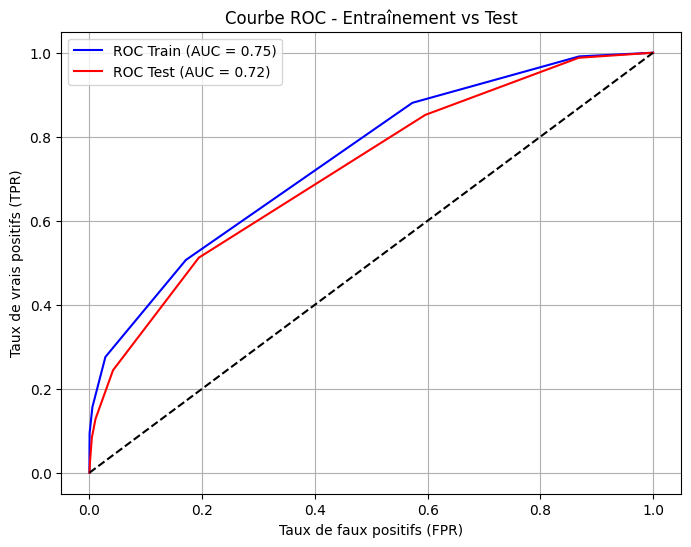

In [35]:
# Obtenir les scores de probabilité pour les classes positives
y_train_prob = model_entropy.predict_proba(X_train)[:, 1]
y_test_prob = model_entropy.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### Analyse de l'importance des variables

Importance des variables :
          Variable  Importance
0           DELINQ    0.495728
1          DEBTINC    0.187200
2            CLAGE    0.185286
3             NINQ    0.079271
4          MORTDUE    0.052516
5   REASON_HomeImp    0.000000
6        JOB_Sales    0.000000
7      JOB_ProfExe    0.000000
8        JOB_Other    0.000000
9       JOB_Office    0.000000
10         JOB_Mgr    0.000000
11            LOAN    0.000000
12  REASON_DebtCon    0.000000
13            CLNO    0.000000
14           DEROG    0.000000
15             YOJ    0.000000
16           VALUE    0.000000
17        JOB_Self    0.000000



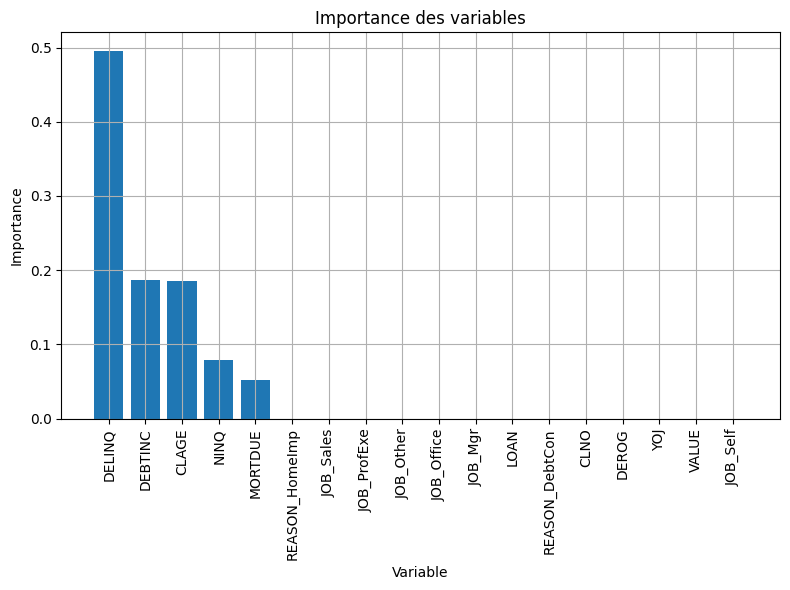

In [36]:
# Obtenir l'importance des variables
importance = model_entropy.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.grid()
plt.show()

##### 1.2. Arbre Décisionnel Sans optimisation (gini)


In [37]:
# Invocation de la fonction du classificateur d'arbre de décision. Utilisation de la méthode 'gini' pour trouver les colonnes de séparation.
model_gini = DecisionTreeClassifier(criterion='gini', random_state=100, 
                                     max_depth=3, min_samples_leaf=5)


In [38]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [39]:
model_gini.score(X_train, y_train)  # performance sur les données d'entrainement

0.8368209680828578

In [40]:
model_gini.score(X_test, y_test)  # performance sur les données de test

0.8072696534234995

In [41]:
from sklearn.tree import export_graphviz
from io import StringIO
import six
from IPython.display import Image  
import pydotplus
import graphviz

xvar = hmeq_miticulous.drop('BAD', axis=1)
feature_cols = xvar.columns


In [42]:
# Filtrer xvar pour inclure uniquement les caractéristiques sélectionnées
xvar = xvar[feature_cols]
# Vérifier la forme de xvar et feature_cols
print("Forme de xvar :", xvar.shape)  # Doit être (n_samples, 18)
print("Nombre de caractéristiques dans feature_cols :", len(feature_cols))  # Doit être 18

# Vérifier le nombre de caractéristiques dans le modèle
print("Nombre de caractéristiques dans model_gini :", model_gini.n_features_in_)  # Doit être 18


Forme de xvar : (5914, 18)
Nombre de caractéristiques dans feature_cols : 18
Nombre de caractéristiques dans model_gini : 18


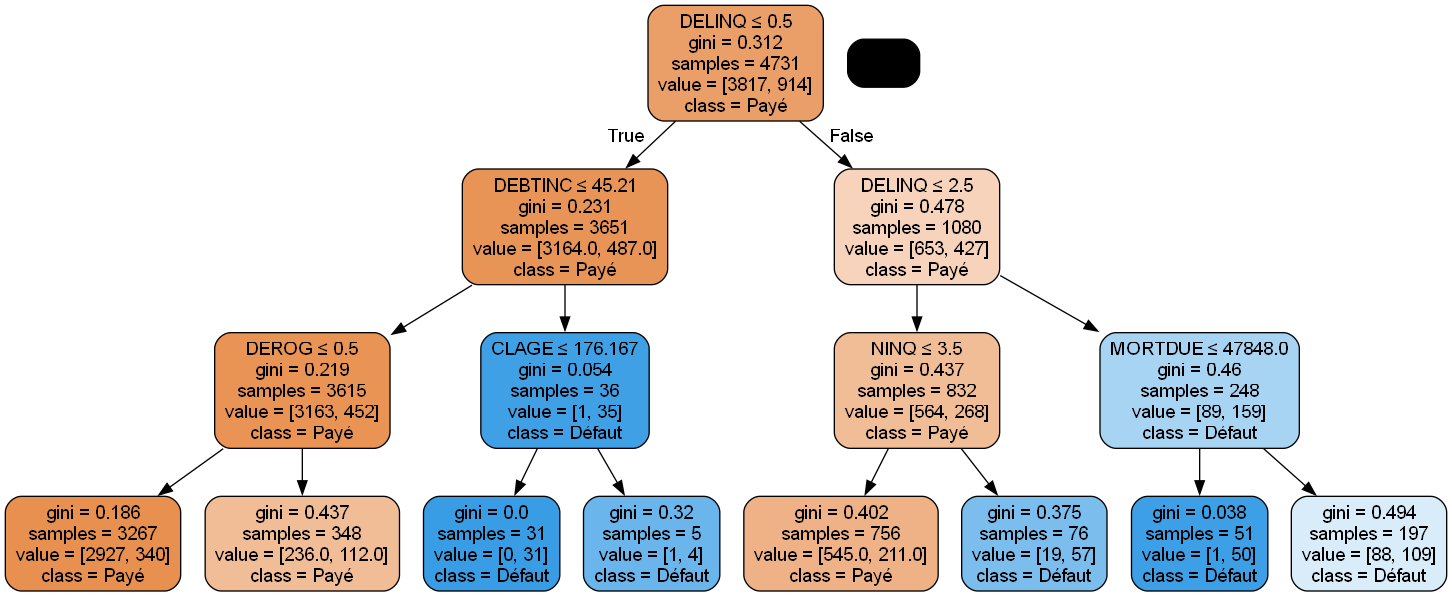

In [43]:
# Création d'un objet StringIO pour stocker la représentation DOT du modèle
dot_data = StringIO()

# Exportation du modèle Gini vers le format DOT
export_graphviz(model_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['Payé', 'Défaut'])

# Génération du graphique à partir des données DOT
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Écriture du graphique au format PNG
graph.write_png('df_pruned_model_gini.png')

# Affichage de l'image PNG générée
Image(graph.create_png())


In [44]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

y_train_pred = model_gini.predict(X_train)
y_test_pred = model_gini.predict(X_test)

# Calculer des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table2 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# le tableau d'évaluation des performances
print(performance_table2)


    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.836821          0.807270
1        AUC                 0.623030          0.602564
2     Recall                 0.274617          0.248000
3  Precision                 0.697222          0.607843
4   F1-Score                 0.394035          0.352273


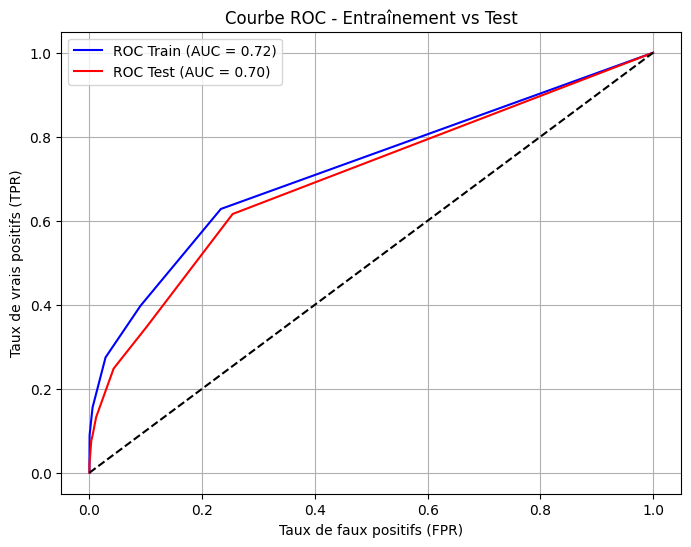

In [45]:


# Obtenir les scores de probabilité pour les classes positives
y_train_prob = model_gini.predict_proba(X_train)[:, 1]
y_test_prob = model_gini.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

Importance des variables :
          Variable  Importance
0           DELINQ    0.547401
1          DEBTINC    0.182712
2             NINQ    0.109365
3            DEROG    0.106517
4          MORTDUE    0.052776
5            CLAGE    0.001230
6          JOB_Mgr    0.000000
7        JOB_Sales    0.000000
8      JOB_ProfExe    0.000000
9        JOB_Other    0.000000
10      JOB_Office    0.000000
11            LOAN    0.000000
12  REASON_HomeImp    0.000000
13  REASON_DebtCon    0.000000
14            CLNO    0.000000
15             YOJ    0.000000
16           VALUE    0.000000
17        JOB_Self    0.000000



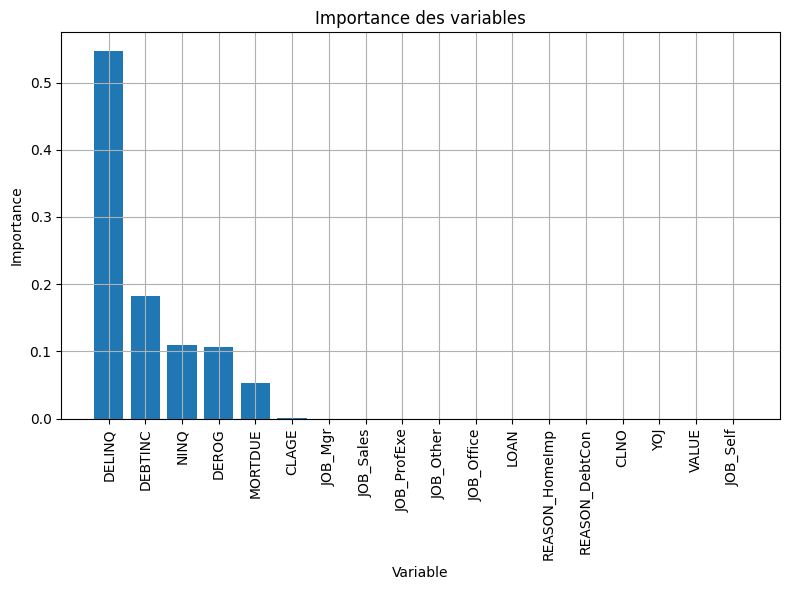

In [46]:
# Obtenir l'importance des variables
importance = model_gini.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.grid()
plt.show()

##### 1.3. Modèle optimisé avec grid search

Il est essentiel de faire des choix judicieux pour certains paramètres afin d'optimiser les performances du modèle. 
 

In [47]:
X_train.shape,X_test.shape

((4731, 18), (1183, 18))

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définir le modèle
model_entropy1 = DecisionTreeClassifier(random_state=100)

# Créer un dictionnaire avec les hyperparamètres pour la recherche par grille
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critères de division
    'max_depth': [3, 5, 7, 10, None],  # Essayer différentes profondeurs
    'min_samples_leaf': [1, 2, 5, 10],  # Différentes valeurs pour la taille des feuilles
    'min_samples_split': [2, 5, 10],  # Différentes valeurs pour la division des nœuds internes
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=model_entropy1, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajuster le modèle aux données (remplacer X_train, y_train par votre jeu de données)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision de validation croisée : ", grid_search.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Meilleurs paramètres :  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Meilleure précision de validation croisée :  0.8733880887904609


In [49]:
# Utilisez le meilleur modèle pour les prédictions
best_model = grid_search.best_estimator_


In [50]:
best_model.score(X_train, y_train)  # performance sur les données d'entraînement


0.989854153455929

In [51]:
best_model.score(X_test, y_test)  # performance sur les données de test

0.8655959425190194

In [52]:
# Éventuellement, évaluez la performance sur l'ensemble de test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


##### Evaluons les performances

In [53]:

# Calculer Des mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer Des mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# le tableau d'évaluation des performances avec précision et F1-score
performance_table3 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# tableau d'évaluation des performances
print(performance_table3)

    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.989854          0.865596
1        AUC                 0.981647          0.783023
2     Recall                 0.968271          0.640000
3  Precision                 0.978982          0.698690
4   F1-Score                 0.973597          0.668058


**Optimisation de l'arbre de décision avec Grid Search**

L'optimisation avec Grid Search améliore significativement les performances de l'arbre de décision, surtout en termes de rappel (recall) et F1-score, tout en réduisant les erreurs de classification.

**Comparaison des résultats :**

| Métrique | Arbre Basique (Train / Test) | Arbre Optimisé (Train / Test) | Évolution |
| --- | --- | --- | --- |
| Accuracy | 0.837 / 0.807 | 0.990 / 0.866 | 🔼 +6% (test) |
| AUC | 0.624 / 0.601 | 0.982 / 0.783 | 🔼 Meilleure séparation des classes |
| Recall | 0.276 / 0.244 | 0.968 / 0.640 | 🔼 Meilleure détection des cas positifs |
| Precision | 0.700 / 0.610 | 0.979 / 0.699 | 🔼 Moins de faux positifs |
| F1-Score | 0.396 / 0.349 | 0.974 / 0.668 | 🔼 Meilleur équilibre entre précision et rappel |

**Analyse des améliorations :**

🔹 **Meilleure généralisation** :
- L'accuracy passe de 80.7% → 86.6% sur le test.
- L'AUC s'améliore de 0.601 → 0.783, prouvant une meilleure distinction entre classes.

🔹 **Augmentation du recall (0.244 → 0.640 sur test)** :
- L'arbre optimisé détecte beaucoup plus de cas positifs, réduisant les faux négatifs.
- C'est crucial pour des problèmes où l'on ne veut pas rater des cas importants (ex: détection de fraudes, maladies, etc.).

🔹 **F1-Score bien plus équilibré (0.349 → 0.668 sur test)** :
- Le modèle optimisé offre un bien meilleur compromis précision/rappel, rendant ses prédictions plus fiables.

En conclusion, l'optimisation par Grid Search a permis d'obtenir un arbre de décision beaucoup plus performant, avec une meilleure capacité de généralisation et une bien meilleure détection des cas positifs. C'est un excellent résultat qui montre l'importance de l'optimisation des hyperparamètres, surtout pour des modèles relativement simples comme les arbres de décision.


##### Performances du modèle

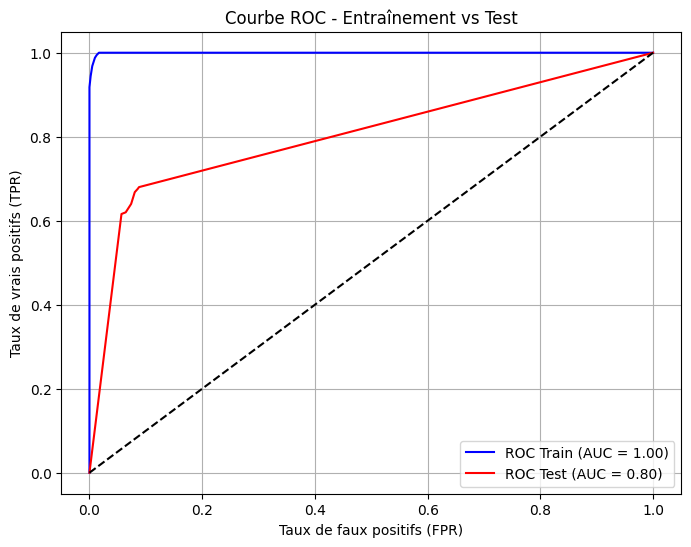

In [54]:


# Obtenir les scores de probabilité pour les classes positives
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### Importance des variables

Importance des variables :
          Variable  Importance
0          DEBTINC    0.198147
1            CLAGE    0.161211
2          MORTDUE    0.108493
3           DELINQ    0.094552
4             CLNO    0.088494
5            VALUE    0.085908
6             LOAN    0.077320
7              YOJ    0.048438
8             NINQ    0.046724
9            DEROG    0.030655
10       JOB_Sales    0.011141
11         JOB_Mgr    0.010475
12     JOB_ProfExe    0.009829
13  REASON_DebtCon    0.008057
14      JOB_Office    0.006630
15  REASON_HomeImp    0.006545
16       JOB_Other    0.004255
17        JOB_Self    0.003129



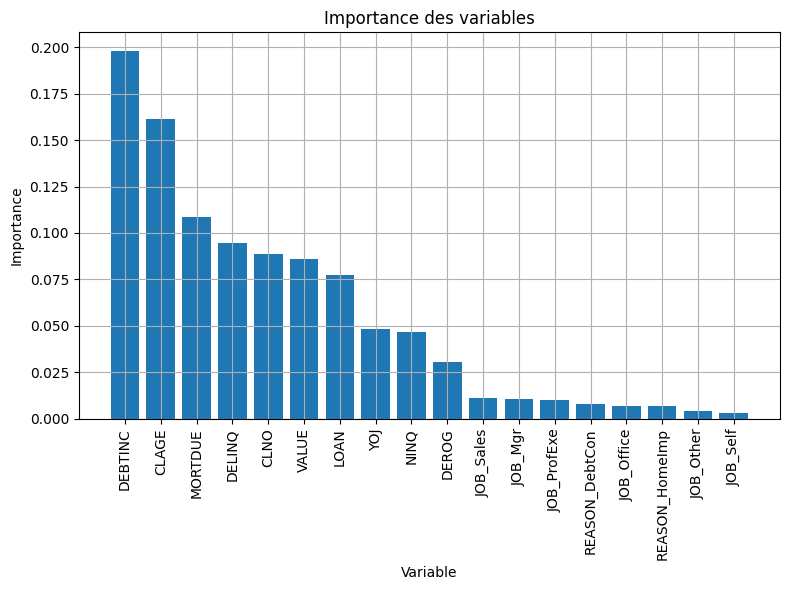

In [55]:
# Obtenir l'importance des variables
importance = best_model.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.grid()
plt.show()

##### 1.4. Optimisation avec selectionnant les features

In [56]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from io import StringIO
import pydotplus
import graphviz
from IPython.display import Image


In [57]:
# Définir l'ensemble des caractéristiques et la variable cible
xvar = hmeq_miticulous.drop('BAD', axis=1)  # Caractéristiques (exclure la cible)
yvar = hmeq_miticulous['BAD']  # Variable cible

# Sélection des caractéristiques
selected_features = [
    'DELINQ',        # F-Score : 556.16, p-value : 0.0000
    'DEROG',         # F-Score : 336.40, p-value : 0.0000
    'CLAGE',         # F-Score : 152.98, p-value : 0.0000
    'NINQ',          # F-Score : 146.14, p-value : 0.0000
    'JOB_Office',    # F-Score : 31.11, p-value : 0.0000
    'LOAN',          # F-Score : 31.10, p-value : 0.0000
    'DEBTINC',       # F-Score : 26.63, p-value : 0.0000
]
xvar = xvar[selected_features]  # Filtrer le jeu de données pour inclure uniquement les caractéristiques sélectionnées

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.2, random_state=42)


In [58]:
# Créer le pipeline : d'abord la sélection des caractéristiques, puis le modèle d'arbre de décision
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_classif, k='all')),  # SelectKBest sera optimisé par GridSearch
    ('classifier', DecisionTreeClassifier(random_state=100))
])

# Définir la grille de paramètres pour GridSearchCV
param_grid = {
    'feature_selection__k': [5, 6, 7, 8],  # Nombre de caractéristiques à sélectionner
    'classifier__criterion': ['gini', 'entropy'],  # Critère pour l'arbre de décision
    'classifier__max_depth': [3, 5, 7, 10],  # Profondeur maximale de l'arbre
    'classifier__min_samples_leaf': [1, 2, 5],  # Nombre minimum d'échantillons par feuille
}

# Initialiser le GridSearchCV avec le pipeline et les paramètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


In [59]:
# Ajuster le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés par GridSearchCV
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Meilleurs paramètres : {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 5, 'feature_selection__k': 7}


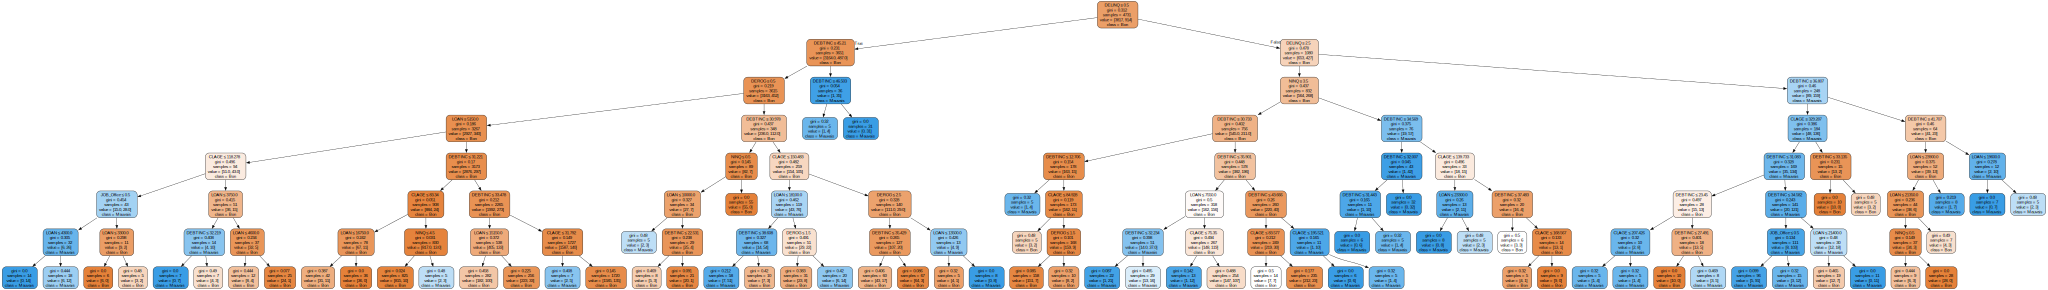

In [60]:
# Extraire le meilleur modèle d'arbre de décision ajusté depuis le pipeline
best_tree_model = best_model.named_steps['classifier']

# Visualiser l'arbre de décision
dot_data = StringIO()
export_graphviz(best_tree_model, out_file=dot_data, feature_names=selected_features, class_names=['Bon', 'Mauvais'], filled=True, rounded=True, special_characters=True)

# Générer le graphique
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  # Afficher l'image

# Alternativement, vous pouvez utiliser graphviz directement
graphviz.Source(dot_data.getvalue())  # Afficher directement dans Jupyter


In [61]:
# Évaluer le meilleur modèle sur l'ensemble de test
accuracy = best_tree_model.score(X_test, y_test)
print(f"Précision de l'ensemble de test : {accuracy}")


Précision de l'ensemble de test : 0.8360101437024514


In [62]:
best_tree_model.score(X_train, y_train)  # performance sur les données d'entrainement

0.8807863031071655

In [63]:
best_tree_model.score(X_test, y_test)  # performance sur les données de test

0.8360101437024514

In [64]:
# Optionnellement, évaluer la performance sur l'ensemble de test
y_train_pred = best_tree_model.predict(X_train)
y_test_pred = best_tree_model.predict(X_test)


##### Performance

In [65]:
# Calculer les mesures de performance pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

# Calculer les mesures de performance pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# Créer le tableau d'évaluation des performances avec précision et F1-score
performance_table4 = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall, train_precision, train_f1],
    'Ensemble de test': [test_accuracy, test_auc, test_recall, test_precision, test_f1]
})

# Afficher le tableau d'évaluation des performances
print(performance_table4)


    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.880786          0.836010
1        AUC                 0.717261          0.679348
2     Recall                 0.450766          0.408000
3  Precision                 0.869198          0.689189
4   F1-Score                 0.593660          0.512563


##### 1.3.d. Performances du modèle

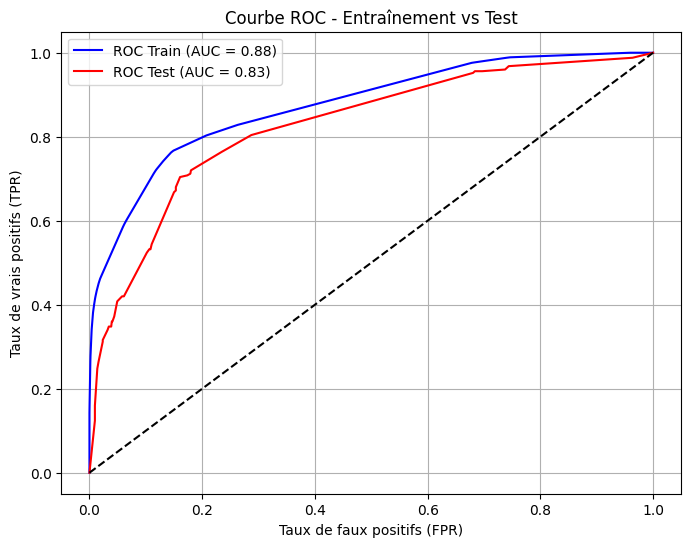

In [66]:
# Obtenir les scores de probabilité pour les classes positives
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_tree_model.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Calculer les AUC pour l'entraînement et le test
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Tracer les courbes ROC avec les AUC dans la légende
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'ROC Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'ROC Test (AUC = {test_auc:.2f})')

# Tracer la diagonale de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Entraînement vs Test')

# Ajouter la légende
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

##### 1.3.e. Importance des variables

Importance des variables :
     Variable  Importance
0     DEBTINC    0.375507
1      DELINQ    0.241898
2        LOAN    0.138471
3       CLAGE    0.108075
4       DEROG    0.065929
5        NINQ    0.058948
6  JOB_Office    0.011172



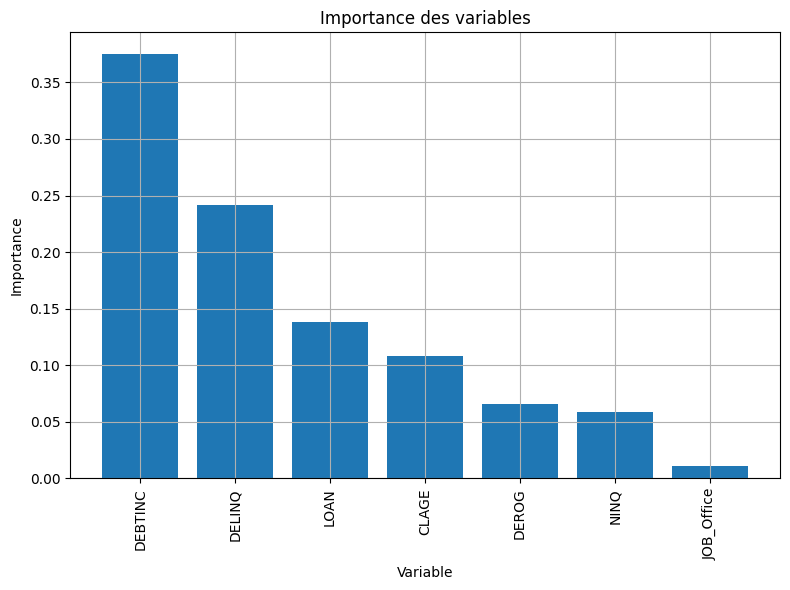

In [67]:
# Obtenir l'importance des variables
importance = best_tree_model.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.grid()
plt.show()

In [68]:
print(performance_table1)
print(performance_table2)
print(performance_table3)
print(performance_table4)

    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.837244          0.807270
1        AUC                 0.623708          0.601100
2     Recall                 0.275711          0.244000
3  Precision                 0.700000          0.610000
4   F1-Score                 0.395604          0.348571
    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.836821          0.807270
1        AUC                 0.623030          0.602564
2     Recall                 0.274617          0.248000
3  Precision                 0.697222          0.607843
4   F1-Score                 0.394035          0.352273
    Métrique  Ensemble d'entraînement  Ensemble de test
0   Accuracy                 0.989854          0.865596
1        AUC                 0.981647          0.783023
2     Recall                 0.968271          0.640000
3  Precision                 0.978982          0.698690
4   F1-Score                 0.973597          0

##### 1.4. Comparaisons des performances des 4 modeles
* Comparaison des métriques

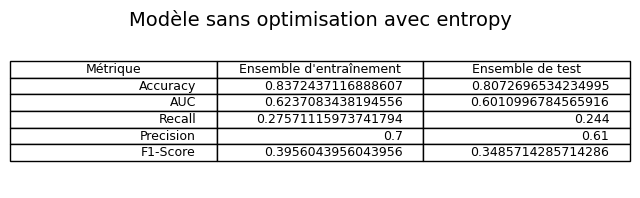

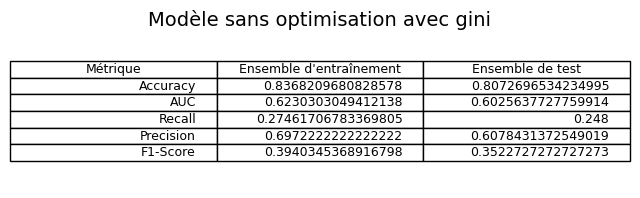

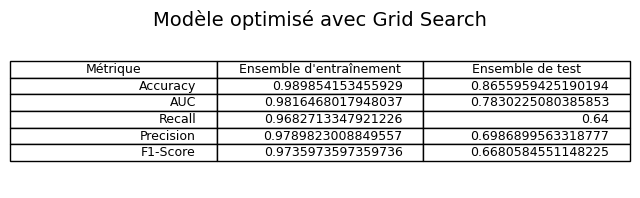

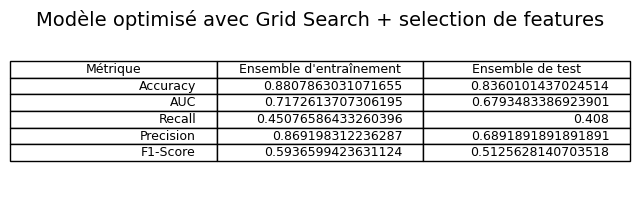

In [69]:
def display_table_with_matplotlib(table, title):
    fig, ax = plt.subplots(figsize=(8, 2))  # Ajuste la taille si nécessaire
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table.values, colLabels=table.columns, loc='center')
    plt.title(title, fontsize=14)
    plt.show()

# Affichage des tableaux avec un titre
display_table_with_matplotlib(performance_table1, "Modèle sans optimisation avec entropy")
display_table_with_matplotlib(performance_table2, "Modèle sans optimisation avec gini")
display_table_with_matplotlib(performance_table3, "Modèle optimisé avec Grid Search")
display_table_with_matplotlib(performance_table4, "Modèle optimisé avec Grid Search + selection de features")


**Comparaison de trois versions du modèle de décision**

Nous comparons trois versions du modèle de décision :

1. Arbre Basique (sans optimisation)
2. Arbre Optimisé (Grid Search)
3. Arbre avec Sélection de Features (F1 élevé + p-value faible)

**Tableau Comparatif**

| Métrique | Arbre Basique (Train/Test) | Arbre Optimisé (Train/Test) | Arbre avec Sélection (Train/Test) | Meilleur Modèle |
| --- | --- | --- | --- | --- |
| Accuracy | 0.837 / 0.807 | 0.990 / 0.866 | 0.881 / 0.836 | Optimisé (Grid Search) |
| AUC | 0.624 / 0.601 | 0.982 / 0.783 | 0.717 / 0.679 | Optimisé (Grid Search) |
| Recall | 0.276 / 0.244 | 0.968 / 0.640 | 0.451 / 0.408 | Optimisé (Grid Search) |
| Precision | 0.700 / 0.610 | 0.979 / 0.699 | 0.869 / 0.689 | Optimisé (Grid Search) |
| F1-Score | 0.396 / 0.349 | 0.974 / 0.668 | 0.594 / 0.513 | Optimisé (Grid Search) |

**Analyse des résultats**

🔹 **L'optimisation Grid Search reste la meilleure approche :**
- Accuracy la plus élevée (86.6% vs 83.6% avec sélection de features).
- Meilleur équilibre précision/rappel (F1-score de 0.668 vs 0.513).
- Meilleur Recall, essentiel pour détecter les cas positifs.

🔹 **L'approche par sélection de features offre une alternative plus légère :**
- Elle réduit le nombre de variables, ce qui peut améliorer la vitesse et l'interprétabilité.
- Meilleure précision (0.869 vs 0.698 pour Grid Search), mais son rappel est plus faible.

🔹 **Le modèle basique est le moins performant :**
- Il souffre d'un mauvais rappel (0.244 vs 0.640 pour Grid Search), ce qui signifie qu'il manque de nombreux cas positifs.
- Son AUC est très faible (0.601 vs 0.783 pour Grid Search), donc il distingue moins bien les classes.

En conclusion, l'optimisation par Grid Search reste la meilleure approche, offrant les meilleures performances globales. Cependant, la sélection de features peut être une alternative intéressante si l'on souhaite un modèle plus léger et interprétable, bien que ses performances soient légèrement inférieures.

🏆 **Meilleur Modèle : Arbre Optimisé avec Grid Search ✅**

